In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from quantumnetworks import SingleModeSystem, plot_full_evolution, MultiModeSystem, time_func
import numpy as np
from timeit import timeit

# Signal Mode PSS

In [3]:
# ramp up on resonance
f_a = 1
f_delta = 0.5
omega_a = 2*np.pi*f_a
delta = 2*np.pi*f_delta
A_in = lambda t: np.exp(1j*(omega_a +delta)*t) #default A_in is used
system = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 2*np.pi*0.1}, A_in = A_in)
x_0 = np.array([0,0])
ts = np.linspace(0, 20, 1001)

In [4]:
X = system.trapezoidal(x_0, ts)

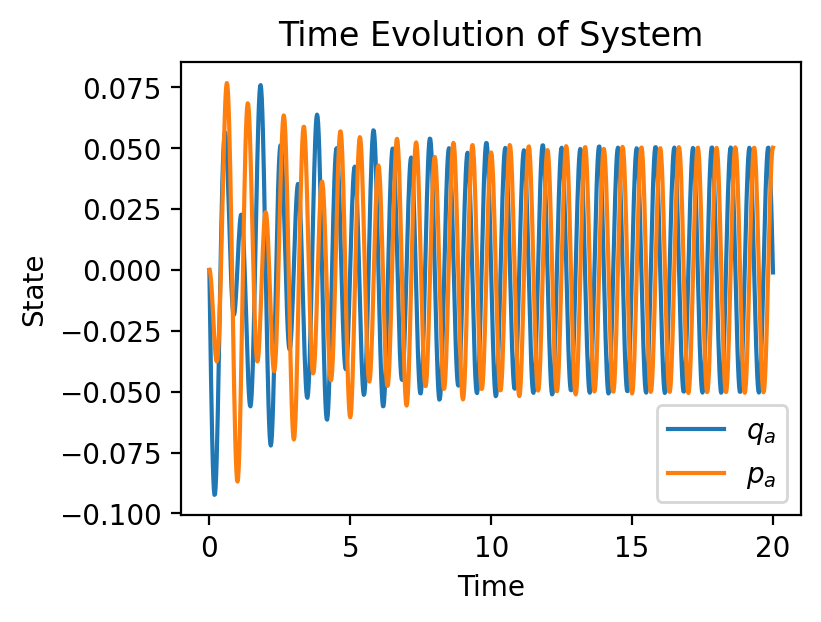

In [5]:
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

In [6]:
time_func(system.trapezoidal, x_0, ts, n=100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.08it/s]


0.19994099140167237

In [7]:
t_points = 1001
T = 1/(f_a+f_delta)
ts_shooting = np.linspace(0,T*3, t_points)

def solve_w_shooting():
    x_0_shooting = system.eval_solve_shooting_newton(np.array([0,0]),ts_shooting)
    return system.trapezoidal(x_0_shooting, ts)
    

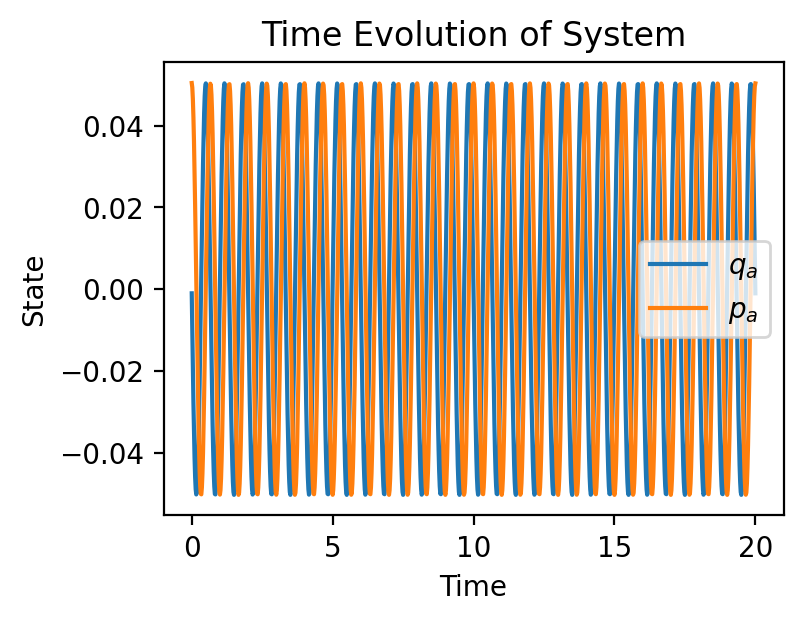

In [8]:
X = solve_w_shooting()
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

In [9]:
time_func(solve_w_shooting, n=10)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:29<00:00,  3.00s/it]


2.8753448128700256

In this case, it is not worth using the shooting method to reach PSS.

# Multi Mode PSS (WIP)

In [10]:
# Params
fs = np.array([1,1])
omegas = 2*np.pi*fs
kappas = 2*np.pi*np.array([0.1,0.1])
gammas = 2*np.pi*np.array([0.001,0.001])
kerrs = 2*np.pi*np.array([0.000,0.000])
couplings = np.array([[0,1,2*np.pi*0.00]])

# Drives
f_drives = fs*1
drives = {0: lambda t: np.exp(1j*f_drives[0]*t), 1: lambda t: np.exp(1j*f_drives[1]*t)}

In [11]:
# Set up system and solve
sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs":kerrs, "couplings":couplings, "drives":drives})
x_0 = np.array([0,0,0,0])
ts = np.linspace(0, 100, 10001)
X = sys.trapezoidal(x_0, ts)

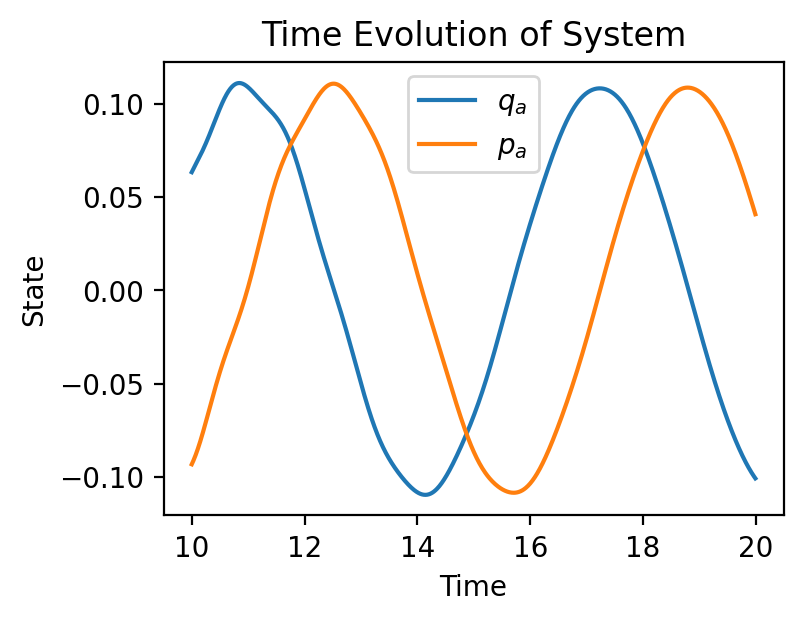

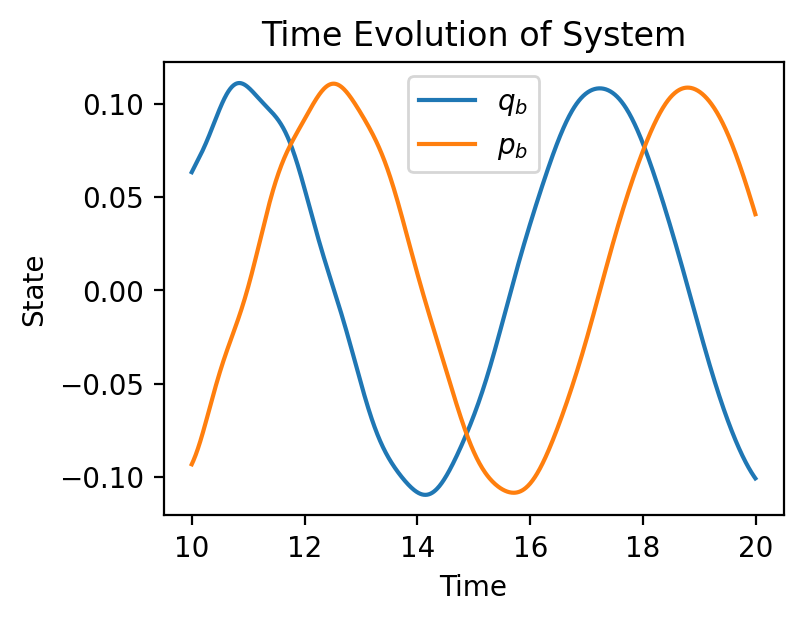

In [12]:
start_indx = 1000
end_indx = 2000
fig, ax = plot_full_evolution(X[:2, start_indx:end_indx], ts[start_indx:end_indx], labels=["$q_a$","$p_a$"])
ax.legend()
fig, ax = plot_full_evolution(X[2:, start_indx:end_indx], ts[start_indx:end_indx], labels=["$q_b$","$p_b$"])
ax.legend()

In [13]:
t_points = 1001
T = 12 # UNSURE ABOUT PERIOD
ts_shooting = np.linspace(0,T, t_points)
x_0_shooting = sys.eval_solve_shooting_newton(np.array([0,0,0,0]),ts_shooting)

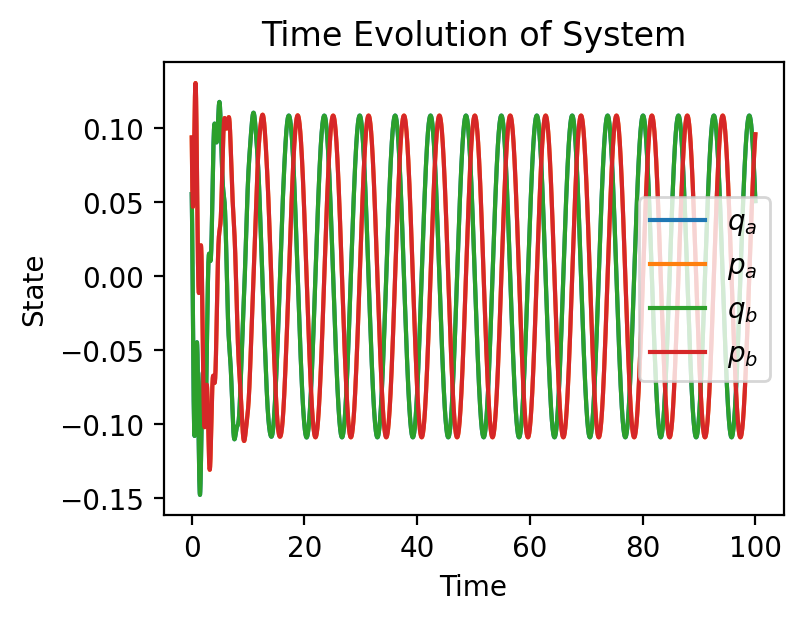

In [14]:
X = sys.trapezoidal(x_0_shooting, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$","$q_b$","$p_b$"])
ax.legend()

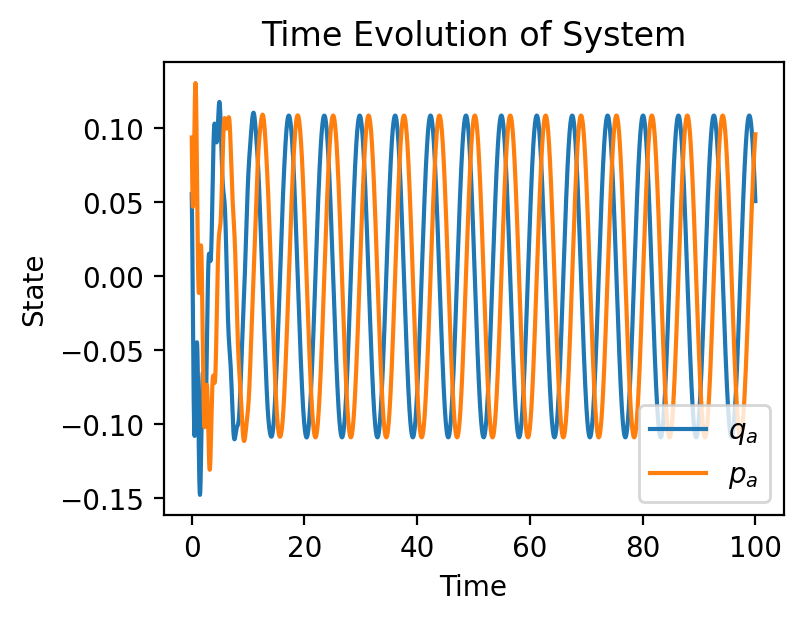

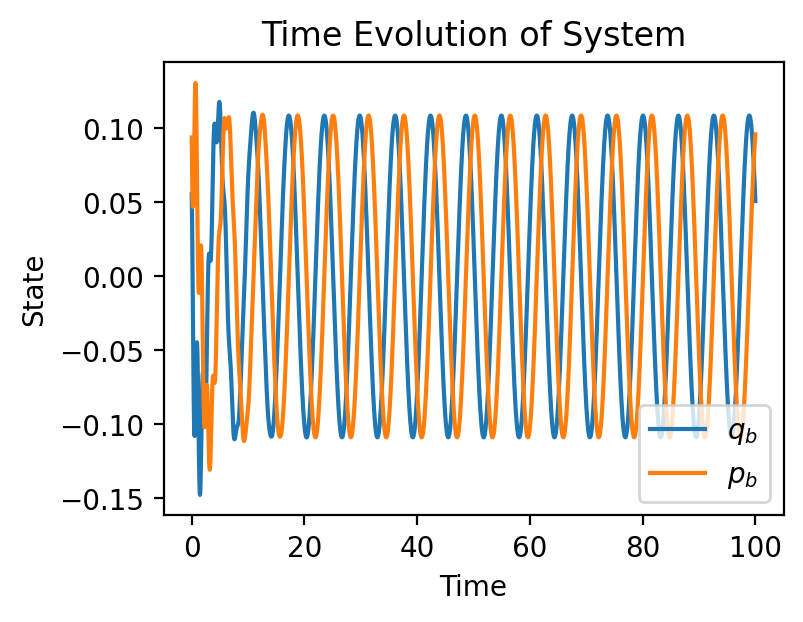

In [15]:
fig, ax = plot_full_evolution(X[:2], ts, labels=["$q_a$","$p_a$"])
ax.legend()
fig, ax = plot_full_evolution(X[2:], ts, labels=["$q_b$","$p_b$"])
ax.legend()